In [4]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image


In [5]:
assert insightface.__version__>='0.7'

In [6]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

download_path: /Users/riyaparikh/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [01:16<00:00, 3664.21KB/s]
/Users/riyaparikh/Desktop/Fun Project/Face Swap/faceswap/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

In [8]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [17]:
img = ins_get_image('t1')
img.shape


(886, 1280, 3)

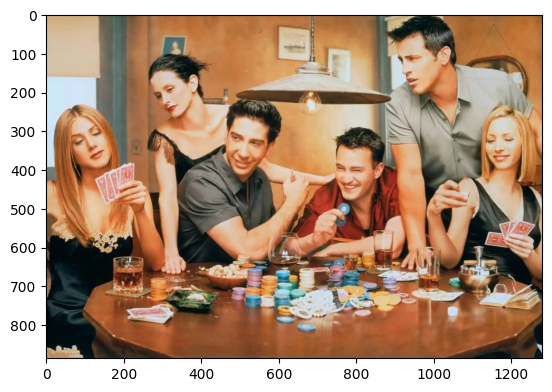

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])

### Detecting faces using the Buffalo_l model

In [21]:
faces = app.get(img)

/Users/riyaparikh/Desktop/Fun Project/Face Swap/faceswap/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [22]:
faces

[{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
  'kps': array([[491.85046, 321.8314 ],
         [541.85266, 332.11188],
         [507.67114, 366.41312],
         [485.91965, 369.691  ],
         [533.74945, 378.3811 ]], dtype=float32),
  'det_score': 0.9196533,
  'landmark_3d_68': array([[ 4.6944370e+02,  2.9698947e+02,  7.5722755e+01],
         [ 4.6813416e+02,  3.1271912e+02,  7.9219681e+01],
         [ 4.6674796e+02,  3.2896017e+02,  8.1507675e+01],
         [ 4.6605328e+02,  3.4532599e+02,  8.0922760e+01],
         [ 4.6692227e+02,  3.6251474e+02,  7.3334030e+01],
         [ 4.7100314e+02,  3.7718726e+02,  6.5856651e+01],
         [ 4.7596683e+02,  3.9025583e+02,  5.8192684e+01],
         [ 4.8284659e+02,  4.0326260e+02,  4.7107620e+01],
         [ 4.9796429e+02,  4.1465970e+02,  4.2562866e+01],
         [ 5.1666071e+02,  4.1299536e+02,  4.6776665e+01],
         [ 5.3089258e+02,  4.0368936e+02,  5.6901127e+01],
         [ 5.4308667e+02,  3.9326663e+02

In [23]:
faces = sorted(faces, key = lambda x : x.bbox[0])


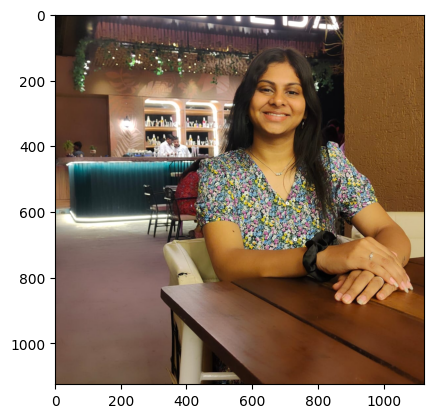

In [27]:
riya = cv2.imread('me.jpeg')
plt.imshow(riya[:,:,::-1])

In [32]:
## Detect and save my face
riya_faces = app.get(riya)
assert len(riya_faces) == 1

AssertionError: 

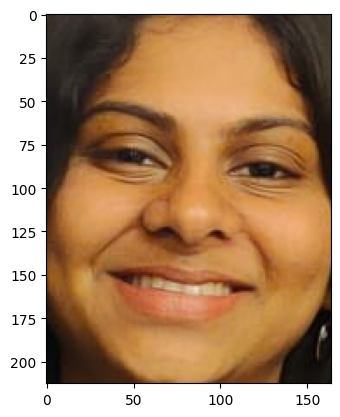

In [35]:
riya_face = riya_faces[0]
bbox = riya_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(riya[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [36]:
#Detect the Friends Faces
faces = app.get(img)


In [39]:
#swap my face for theirs on the image
res = img.copy()
for face in faces:
    res = swapper.get(res,face,riya_face,paste_back=True)

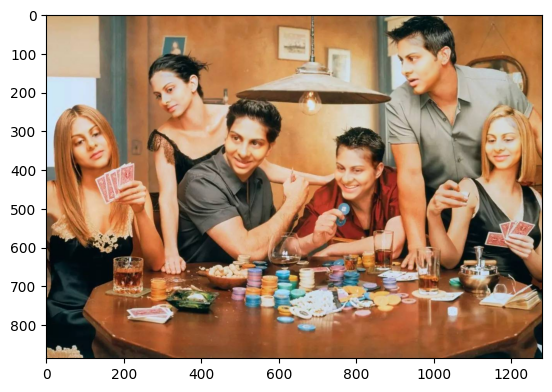

In [40]:
plt.imshow(res[:,:,::-1])
plt.show()

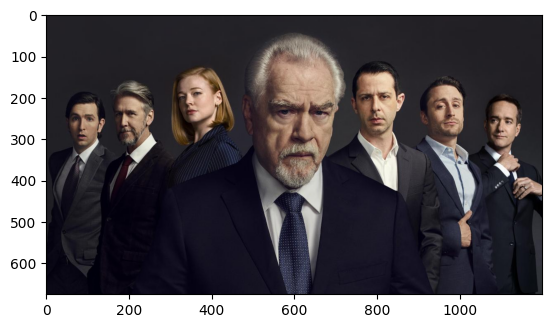

In [44]:
#swap with succession
suc = cv2.imread('succession.jpeg')
plt.imshow(suc[:,:,::-1])

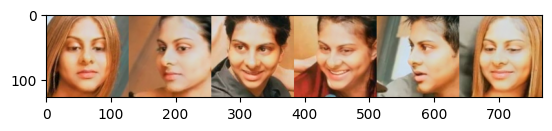

In [45]:
#selecting all the faces in the photo
res = []
for face in faces:
    _img, _ = swapper.get(img,face,riya_face,paste_back=False)
    res.append(_img)
res = np.concatenate(res,axis=1)
plt.imshow(res[:,:,::-1])
plt.show()

In [46]:
faces = app.get(suc)
len(faces)

/Users/riyaparikh/Desktop/Fun Project/Face Swap/faceswap/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


7

In [ ]:
#selecting all the faces in the photo
faces = app.get(suc)
res = []
for face in faces:
    _img, _ = swapper.get(img,face,riya_face,paste_back=False)
    res.append(_img)
res = np.concatenate(res,axis=1)
plt.imshow(res[:,:,::-1])
plt.show()

In [24]:



if __name__ == '__main__':
    app = FaceAnalysis(name='buffalo_l')
    app.prepare(ctx_id=0, det_size=(640, 640))
    swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=True, download_zip=True)

    
    # img = ins_get_image('t1')
    faces = app.get(img)
    faces = sorted(faces, key = lambda x : x.bbox[0])
    assert len(faces)==6
    source_face = faces[2]
    res = img.copy()
    for face in faces:
        res = swapper.get(res, face, source_face, paste_back=True)
    cv2.imwrite("./t1_swapped.jpg", res)
    res = []
    for face in faces:
        _img, _ = swapper.get(img, face, source_face, paste_back=False)
        res.append(_img)
    res = np.concatenate(res, axis=1)
    cv2.imwrite("./t1_swapped2.jpg", res)


/Users/riyaparikh/Desktop/Fun Project/Face Swap/faceswap/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/riyaparikh/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

/Users/riyaparikh/Desktop/Fun Project/Face Swap/faceswap/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4
